In [2]:
import warnings

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')

***Задача 1***

Даны значения зарплат из выборки выпускников:

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150.

Без использования статистических функций вроде mean, std, var, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.




In [8]:
graduates = pd.Series([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150])

In [11]:
graduates

0     100
1      80
2      75
3      77
4      89
5      33
6      45
7      25
8      65
9      17
10     30
11     24
12     57
13     55
14     70
15     75
16     65
17     84
18     90
19    150
dtype: int64

1.Посчитать среднее арифметическое

In [12]:
mean_graduates = graduates.sum() / graduates.count()
mean_graduates

65.3

In [13]:
graduates.mean()

65.3

2.Посчитаем среднее квадратичное отклонение

In [15]:
(graduates - graduates.mean()) ** 2

0     1204.09
1      216.09
2       94.09
3      136.89
4      561.69
5     1043.29
6      412.09
7     1624.09
8        0.09
9     2332.89
10    1246.09
11    1705.69
12      68.89
13     106.09
14      22.09
15      94.09
16       0.09
17     349.69
18     610.09
19    7174.09
dtype: float64

In [16]:
graduates_std = np.sqrt(((graduates - graduates.mean()) ** 2).sum() / graduates.count())
graduates_std

30.823854398825596

In [17]:
graduates.std(ddof=0)

30.823854398825596

3.Найдем смещенную  оценку дисперсий

In [18]:
graduates_variance = ((graduates - graduates.mean()) ** 2).sum() / graduates.count()
graduates_variance

950.11

In [20]:
graduates.var(ddof=0)

950.11

4.Найдем несмещенную  оценку дисперсий

In [19]:
graduates_variance2 = ((graduates - graduates.mean())**2).sum() / (graduates.count() - 1)
graduates_variance2

1000.1157894736842

In [21]:
graduates.var(ddof=1)

1000.1157894736842

***Задача 2***

Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из boxplot. В этой задаче можно использовать статистические функции.


In [24]:
graduates.quantile([0.25, 0.75])

0.25    42.0
0.75    81.0
dtype: float64

In [49]:
iqr = graduates.quantile(0.75) - graduates.quantile(0.25)

In [50]:
# интерквартильное расстояние
iqr

39.0

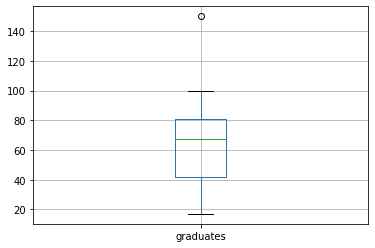

In [48]:
df = pd.DataFrame(columns=['graduates'])
df['graduates'] = pd.Series([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150])
df[['graduates']].boxplot()

In [52]:
boxplot_range = (df['graduates'].quantile(0.25) - 1.5 * iqr, df['graduates'].quantile(0.75) + 1.5 * iqr)
boxplot_range

(-16.5, 139.5)

In [53]:
outliers = df.loc[(df['graduates'] < boxplot_range[0]) | (df['graduates'] > boxplot_range[1])]

outliers.shape[0]

1

Доля выбросов:

In [54]:
outliers.shape[0] / df.shape[0]

0.05

***Задача 3***

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

In [13]:
a=0.8
b=0.7
c=0.9

#сдавшие студенты всего количества поступивших
# p=n1*a+n2*b+(n1+n2)*c
# Если рассматривать p = 1(общее количество)
# По условию на факультеты A и B поступило равное количество студентов,
# а на факультет C студентов поступило столько же, сколько на A и B вместе, 
# то 
n1 = 0.25
n2 = 0.25

In [14]:
p_A = n1*a/(n1*a+n2*b+(n1+n2)*c)
# студент из факультета A

p_B = n2*b/n1*a+n2*b+(n1+n2)*c 
# студент из факультета B

p_C = (n1+n2)*c/n1*a+n2*b+(n1+n2)*c
# студент из факультета C


In [15]:
print(p_A, 'студент из факультета A')

print(p_B, 'студент из факультета B')

print(p_C, 'студент из факультета C')

0.24242424242424246 студент из факультета A
1.1849999999999998 студент из факультета B
2.0650000000000004 студент из факультета C
